In [115]:
import csv
import sqlite3
import matplotlib.pyplot as plt

import pandas as pd

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [ ]:
# Using cursor.execute()
connection = sqlite3.connect(
    "C:/Users/user/PythonProject/advanced_topic/py-restaurant-data-analysis/db.sqlite3"
)
cursor = connection.cursor()

cursor.execute(
    "SELECT restaurant_product.name, restaurant_product.price, restaurant_orderitem.quantity, restaurant_order.datetime FROM restaurant_product JOIN restaurant_orderitem ON restaurant_product.id = restaurant_orderitem.product_id JOIN restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id"
)
all_products = cursor.fetchall()

with open("out.csv", "w", encoding="utf-8", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["name", "price", "quantity", "datetime"])
    writer.writerows([product for product in all_products])

df = pd.read_csv("out.csv")

# Using pd.read_sql_query()
new_df = pd.read_sql_query(
    "SELECT restaurant_product.name, restaurant_product.price, restaurant_order.datetime, restaurant_orderitem.quantity FROM restaurant_product JOIN restaurant_orderitem ON restaurant_product.id = restaurant_orderitem.product_id JOIN restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id",
    connection,
)
new_df.to_csv("hi.csv", index=False)

cursor.close()
connection.close()

df

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

In [ ]:
most_popular = (
    df.groupby(by="name", as_index=False)
    .sum("quantity")
    .sort_values(by="quantity")
    .tail(10)
)

plt.pie(
    most_popular["quantity"],
    labels=most_popular["name"],
    autopct=lambda p: "{:.2f}%({:.0f})".format(
        p, (p / 100) * sum(most_popular["quantity"])
    )
)
plt.title("Top 10 most popular products in restaurant by quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

In [ ]:
df["item_price"] = df["price"] * df["quantity"]
top_ten = df.sort_values(by="item_price").tail(10)

plt.pie(
    top_ten["item_price"],
    labels=top_ten["name"],
    autopct=lambda p: "{:.2f}%({:.0f})".format(
        p, (p / 100) * sum(top_ten["item_price"])
    ),
    pctdistance=0.6,
)
plt.title("Top 10 position in meny which make the most money for restaurant")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

<AxesSubplot: title={'center': 'Profit by hour'}, xlabel='order_hour'>

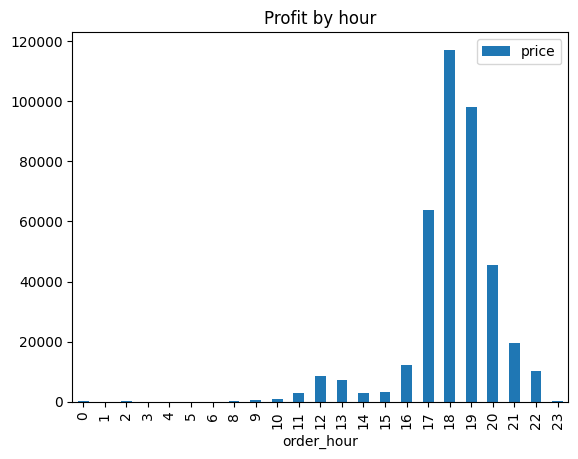

In [112]:
df["order_hour"] = pd.to_datetime(df["datetime"]).dt.hour

hour_df = df.groupby("order_hour", as_index=False).sum()

hour_df.plot.bar(x="order_hour", y="price", title="Profit by hour")

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

<AxesSubplot: title={'center': 'Profit by day of week'}, xlabel='day_of_week'>

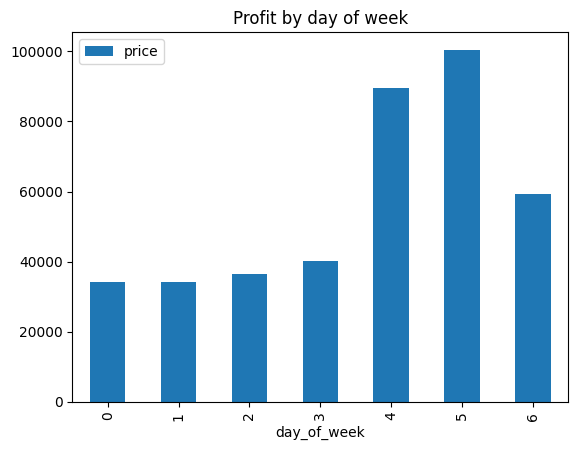

In [109]:
df["day_of_week"] = pd.to_datetime(df["datetime"]).dt.dayofweek
df2 = df.groupby(by="day_of_week", as_index=False).sum()

df2.plot.bar(x="day_of_week", y="price", title="Profit by day of week")